# COURSE: A deep understanding of deep learning
## SECTION: Gradient descent
### LECTURE: Parametric experiments on g.d.
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202401
##### Modified from original code

In [2]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Running experiments to understand gradient descent

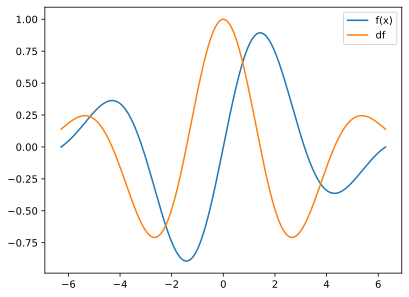

In [3]:
# the function
x  = np.linspace(-2*np.pi,2*np.pi,401)
fx = np.sin(x) * np.exp(-x**2*.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*.05) + np.sin(x)*(-.1*x)*np.exp(-x**2*.05)

# quick plot for inspection
plt.plot(x,fx, x,df)
plt.legend(['f(x)','df']);

In [4]:
# function (note: over-writing variable names!)
def fx(x):
  return np.sin(x) * np.exp(-x**2*.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*.05) - np.sin(x)*.1*x*np.exp(-x**2*.05)

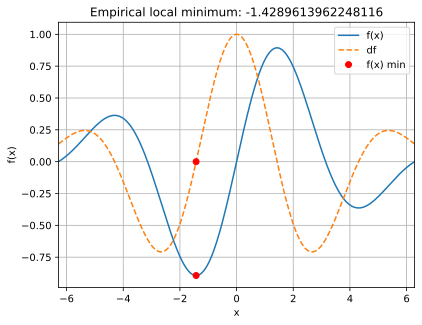

In [5]:
# random starting point
localmin = np.random.choice(x,1)#np.array([6])#

# learning parameters
learning_rate = .01
training_epochs = 1000

# run through training
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate*grad



# plot the results
plt.plot(x,fx(x), x,deriv(x),'--')
plt.plot(localmin,deriv(localmin),'ro')
plt.plot(localmin,fx(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()


# Run parametric experiments

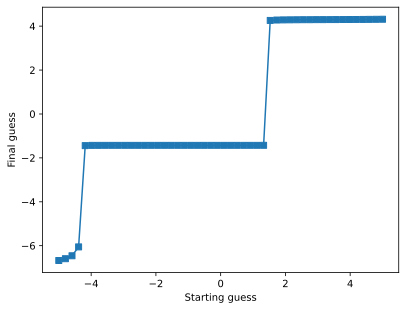

In [8]:
# Experiment 1: systematically varying the starting locations
# works for higher dimension (>2D) too

training_epochs = 1000

startlocs = np.linspace(-5,5,50)
finalres = np.zeros(len(startlocs))

# loop over starting points
for idx,localmin in enumerate(startlocs):

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate*grad

  # store the final guess
  finalres[idx] = localmin


# plot the results 
# Conclusion: start guess [-4,1.5] will converge to global min, -1.42
plt.plot(startlocs,finalres,'s-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()

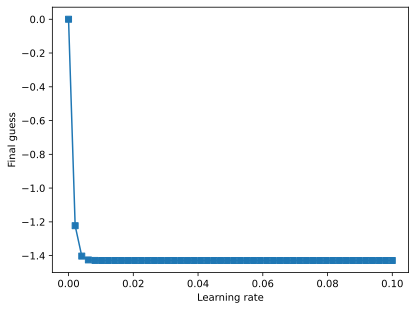

In [9]:
# Experiment 2: systematically varying the learning rate

training_epochs = 1000

learningrates = np.linspace(1e-10,1e-1,50)
finalres = np.zeros(len(learningrates))

# loop over learning rates
for idx,learningRate in enumerate(learningrates):

  # fix starting guess to 0
  localmin = 0

  # run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learningRate*grad

  # store the final guess
  finalres[idx] = localmin

# Plot the results
# Conclusion: lr=0.01 produces global min, lr=[0.02,0.10] produces reasonable min
plt.plot(learningrates,finalres,'s-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

In [17]:
# Experiment 3: interaction between learning rate and training epochs

# setup parameters
learningrates = np.linspace(1e-10,1e-1,50)
training_epochs = np.round(np.linspace(10,500,40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates),len(training_epochs)))

# loop over learning rates
for lr_idx,learningRate in enumerate(learningrates):

  # loop over training epochs
  for epoch_idx,trainEpochs in enumerate(training_epochs):

    # run through training (again fixing starting location)
    localmin = 0
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - learningRate*grad

    # store the final guess
    finalres[lr_idx,epoch_idx] = localmin

print(f'[1] lr: {learningrates}\n[2] epochs: {training_epochs}\n')
print("--For each lr, we track the predictions at each epoch--")
print("Final guesses:", finalres)

[1] lr: [1.00000000e-10 2.04081642e-03 4.08163275e-03 6.12244907e-03
 8.16326540e-03 1.02040817e-02 1.22448980e-02 1.42857144e-02
 1.63265307e-02 1.83673470e-02 2.04081633e-02 2.24489797e-02
 2.44897960e-02 2.65306123e-02 2.85714286e-02 3.06122450e-02
 3.26530613e-02 3.46938776e-02 3.67346939e-02 3.87755103e-02
 4.08163266e-02 4.28571429e-02 4.48979592e-02 4.69387756e-02
 4.89795919e-02 5.10204082e-02 5.30612245e-02 5.51020409e-02
 5.71428572e-02 5.91836735e-02 6.12244898e-02 6.32653062e-02
 6.53061225e-02 6.73469388e-02 6.93877551e-02 7.14285715e-02
 7.34693878e-02 7.55102041e-02 7.75510204e-02 7.95918368e-02
 8.16326531e-02 8.36734694e-02 8.57142857e-02 8.77551021e-02
 8.97959184e-02 9.18367347e-02 9.38775510e-02 9.59183674e-02
 9.79591837e-02 1.00000000e-01]
[2] epochs: [ 10.  23.  35.  48.  60.  73.  85.  98. 111. 123. 136. 148. 161. 173.
 186. 198. 211. 224. 236. 249. 261. 274. 286. 299. 312. 324. 337. 349.
 362. 374. 387. 399. 412. 425. 437. 450. 462. 475. 487. 500.]

--For each 

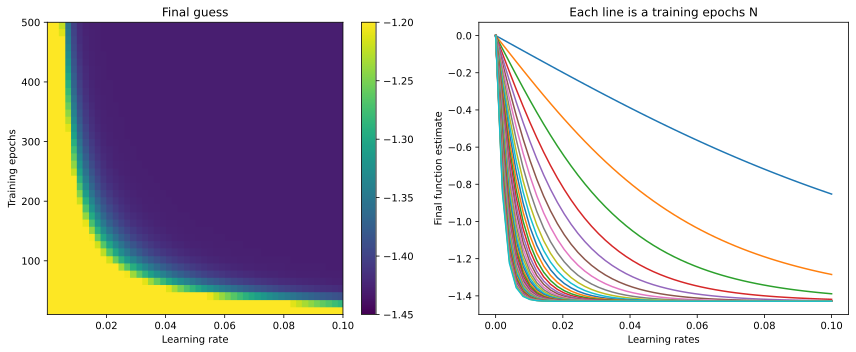

In [37]:
# plot the results
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# First subplot - heatmap
im = axs[0].imshow(finalres.T, extent=[learningrates[0], learningrates[-1], training_epochs[0], training_epochs[-1]],
                   aspect='auto', origin='lower', vmin=-1.45, vmax=-1.2)
axs[0].set_xlabel('Learning rate')
axs[0].set_ylabel('Training epochs')
axs[0].set_title('Final guess')
fig.colorbar(im, ax=axs[0])  # Attach colorbar to first subplot

# Second subplot - line plot
axs[1].plot(learningrates, finalres)
axs[1].set_xlabel('Learning rates')
axs[1].set_ylabel('Final function estimate')
axs[1].set_title('Each line is a training epochs N')

plt.tight_layout()
plt.show()

# Interpretation:
# Model produces good results (darkblue zone) when lr and epoch are sufficiently high
# The optimal model is to choose lr = 0.10, epoch = 90

# Additional explorations

In [ ]:
# 1) In experiment 3, set the starting location to be 1.6. Re-run the experiment and the image. You'll need to re-adjust
#    the figure color limits; check the line plots at the top of the code to determine a useful color range. Does the new
#    starting value change your conclusions about the interaction between learning rate and training epochs?
#
# 2) In the same experiment, now change the starting location to be random (use code: np.random.choice(x,1)). How do these
#    results look? Are you surprised? Are the results of this experiment still interpretable and what does this tell you
#    about running experiments in DL?
#